# Relatório do Processamento de Consulta

## Alunos:

### Alexandre Luis Ribeiro Martins
### Diego Santos Gonçalves
### Gabriel Arrighi Silva

In [1]:
from query.processing import QueryRunner

QueryRunner.main()

Existe o doc? index.hasDocId(105047)
Precomputando valores atraves do indice...
Precomputou valores done in 1.738778


100%|██████████| 786915/786915 [01:57<00:00, 6692.02it/s] 


Finalizando consultas. :)


### Análise a ocorrência de termos no documento fazendo, no mínimo:

 - Quais são os 10 termos com maior e menor IDF da coleção? Com base nos termos de menor IDF, será que podiamos propor stopwords novas? Com base nesses termos, existe algo que você poderia melhorar no processamento?


In [2]:
from query.ranking_models import IndexPreComputedVals

IndexPreComputedVals.print_top_idf()

Top 10 melhores idf:
1: (15.908181492953341, '��\u200f')
2: (15.908181492953341, '�c�û�û‹o‹ì+ëra‹å‰.–�œ�˜�a�‰v¸�vuÿv�')
3: (15.908181492953341, '�')
4: (15.908181492953341, '￥88,54')
5: (15.908181492953341, '￥360,00')
6: (15.908181492953341, '￥297,26')
7: (15.908181492953341, '￥236,79')
8: (15.908181492953341, '￥225,82')
9: (15.908181492953341, '￥144,15')
10: (15.908181492953341, '￥122,78')
Top 10 piores idf:
1: (0.061760655179727016, 'de')
2: (0.19519781167858183, 'da')
3: (0.34752026802547564, 'do')
4: (0.3715700063275667, 'uma')
5: (0.37494302713755256, 'com')
6: (0.3827218577739812, 'categoria')
7: (0.5331420616064177, 'em')
8: (0.5478830663352967, 'o')
9: (0.5934920471228493, 'um')
10: (0.5981013003754387, 'por')


### Resposta:

 - ### Sim, poderiamos remover mais stopwords como 'de', 'da', 'do', 'uma', etc.

 - ### Sim, existe algo que poderiamos melhorar no processamento, como o tratamento de caracteres especiais inesperados e tratamento de unidades de medidas, como no caso das unidades monetárias.

- Apresente o gráfico de frequência das palavras. Tais palavras devem ser ordenadas decrescentemente de acordo com a sua frequência e devem ser todas representadas no eixo x. Note que a frequencia da palavra é a frequência total do termo na coleção (definido por F(termo) na aula sobre TF-IDF). De forma similar, faça o gráfico do IDF de cada palavra (veja o grafico similar na aula sobre TF-IDF). Mostra também, quais tipos de palavras (específicas? Erros de processamento?) possuem TF alto, mediano e baixo. Faça o mesmo para IDF. Note que esse grafico deve conter todas as palavras. Não é necessário apresentar todos os valores do eixo x (palavras), pois, ficaria difícil de visualizar. 

[2099982, 874841, 687745, 632021, 592431, 592166, 493177, 327682, 309493, 307357]


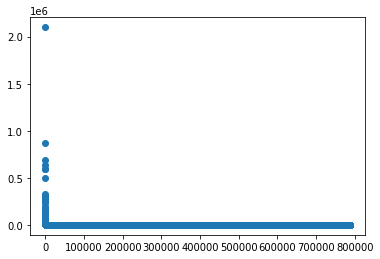

In [3]:
IndexPreComputedVals.plot_terms_freq()

In [4]:
IndexPreComputedVals.term_freq_list[:10]

[(2099982, 'de'),
 (874841, 'o'),
 (687745, 'do'),
 (632021, 'da'),
 (592431, 'semi'),
 (592166, 'em'),
 (493177, 'que'),
 (327682, 'com'),
 (309493, 'um'),
 (307357, 'uma')]

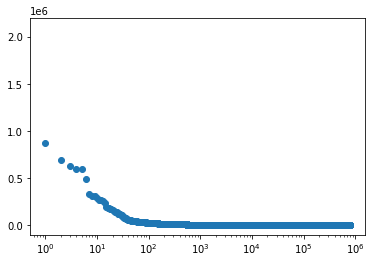

In [44]:
import matplotlib.pyplot as plt
import math

x = [i for i in range(len(IndexPreComputedVals.term_freq_list))]
y = [freq for freq, _ in IndexPreComputedVals.term_freq_list]
_, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xscale('log')

plt.show()


In [26]:
from query.ranking_models import VectorRankingModel

tf = [(VectorRankingModel.tf(freq_term), term) for freq_term, term in IndexPreComputedVals.term_freq_list]

In [27]:
tf[:10]

[(22.00194553120508, 'de'),
 (20.73866130926108, 'o'),
 (20.391514220426608, 'do'),
 (20.269612969694453, 'da'),
 (20.17628760860869, 'semi'),
 (20.175642133071925, 'em'),
 (19.91174599364295, 'que'),
 (19.321936900372215, 'com'),
 (19.23954725389415, 'um'),
 (19.229555816999518, 'uma')]

In [28]:
tf[-10:]

[(1.0, '++max'),
 (1.0, '++gp'),
 (1.0, "'t"),
 (1.0, "'patafisica"),
 (1.0, "'d"),
 (1.0, "'=f'+g"),
 (1.0, "'=c.f"),
 (1.0, "'="),
 (1.0, "'87\xad'93"),
 (1.0, "'66\xad'67")]

In [37]:
mid = 0

for i, (x, _) in enumerate(tf):
    if x <= 10:
        mid = i
        break

tf[mid:mid+10]

[(10.0, 'visitas'),
 (10.0, 'serio'),
 (10.0, 'seriado'),
 (10.0, 'privilegios'),
 (10.0, 'optica'),
 (10.0, 'misterio'),
 (10.0, 'liberalismo'),
 (10.0, 'corta'),
 (10.0, 'concedeu'),
 (10.0, 'acompanhar')]

- TF altos são geralmente conectivos
- TF baixos são geralmente erros ou termo de contextos muito específicos
- TF médios são geralmente adjetivos, substantivos ou verbos

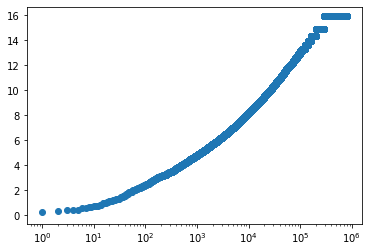

In [43]:
x = [i for i in range(len(VectorRankingModel.idf_list))]
y = [i for i,_ in VectorRankingModel.idf_list]

_, ax = plt.subplots()

ax.scatter(x, y)
ax.set_xscale('log')

plt.show()